<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="left" width="30%"><img src="images/IST_logo.png" width="50%"></td>
        <td width="40%"></td>
        <td align="right" width="30%"><img src="images/ds_logo.png" width="25%"></td>
    </tr>
    <tr><td align="left" width="30%"></td>
        <td width="40%"><p align="center"><img src="images/title.png"</td>
        <td align="right" width="30%"></td>
    </tr>
</table>

<h1 align="center" style="font-family:Arial;color:#6c6c6c;font-size:30px;">Lab 3: Classification (cont.)</h1>

<h2 style="font-family:Arial;color:#6c6c6c;font-size:25px;">Naive Bayes</h2>

Naive Bayes is one of the most famous classification techniques, one of the most simplest ones, and the easiest to 
apply.

Like other Bayesian techniques, it just chooses the most probable class for each record, according to the estimation 
of the probability of each class given the record, whose label we want to predict. The trick and simplicity of 
Naive Bayes resides in the assumption of conditional independence among the variables, with simplifies that estimation
and turns Naive Bayes as the standard baseline for classification.

Indeed, we can evaluate the performance of each classifier over a given dataset, simply by comparing their results
among each other, in particular with the results of Naive Bayes over the dataset.

The nicest property of Naive Bayes is that it is not parametrizable, and so, its performance serves as a comparison 
baseline: any model is only interesting if it outperforms the one learnt through Naive Bayes.

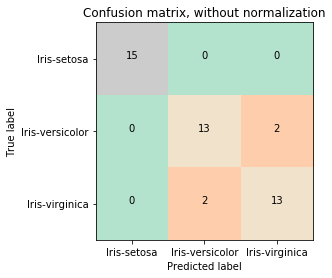

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
%load functions.ipynb
import ipynb.fs.defs.functions as func

data: pd.DataFrame = pd.read_csv('data/iris.csv')
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

clf = GaussianNB()
clf.fit(trnX, trnY)
prdY = clf.predict(tstX)
cnf_mtx = metrics.confusion_matrix(tstY, prdY, labels)
func.plot_confusion_matrix(plt.gca(), cnf_mtx, labels)

If we inspect the classes available in the <code>sklearn.naive_bayes</code> package, we see there are more then the
<code>GaussianNB</code> estimators. Indeed, there are also the <code>MultinomialNB</code> and the <code>BernoulliNB</code>,
that are adequate to use when the data distribution is close to be a multinomial or Bernoulli.

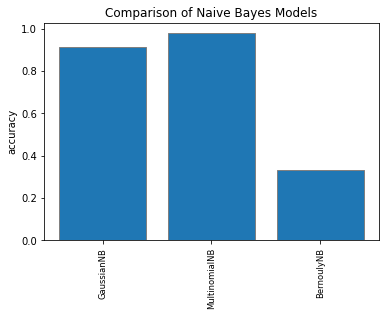

In [16]:
estimators = {'GaussianNB': GaussianNB(), 
              'MultinomialNB': MultinomialNB(), 
              'BernoulyNB': BernoulliNB()}

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.accuracy_score(tstY, prdY))

plt.figure()
func.bar_chart(plt.gca(), xvalues, yvalues, 'Comparison of Naive Bayes Models', '', 'accuracy')
plt.show()

<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="center" width="30%"><a href="Lab2_preparation.ipynb"><img src="images/prev.png"></a></td>
        <td width="40%"></td>
        <td align="center" width="30%"><a href="Lab31_naivebayes.ipynb"><img src="images/next.png"></a></td>
    </tr>
</table>